---
# Linear Transformations and Space Stretching
---

In this notebook, we will have a look at some of the methods how multidimensional data can be decomposed into a more simpler representatin in terms lesser dimensions. 

This is a key concept while working with neural networks, that basically decomposes a set of features into a latent space, extracting some of the most important features from the data that allows it to perform operations such as image recognition, comparing the images of two objects to determine whether they have a considerable degree of similarity or not, etc.

Thus having a basic understanding of matrix decomposition is very crucial to establishing a good understanding of DL.

Let us begin by importing the required modules.

## Importing Dependencies
---

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from res.plot_lib import *

Now, let us set the default plotting properties. For this, we are using custom method imported from plot_lib.py.

In [9]:
set_default()

In [10]:
# setting default CUDA GPU as the default pytorch computational device
device = torch.device('cpu' )
device

device(type='cpu')

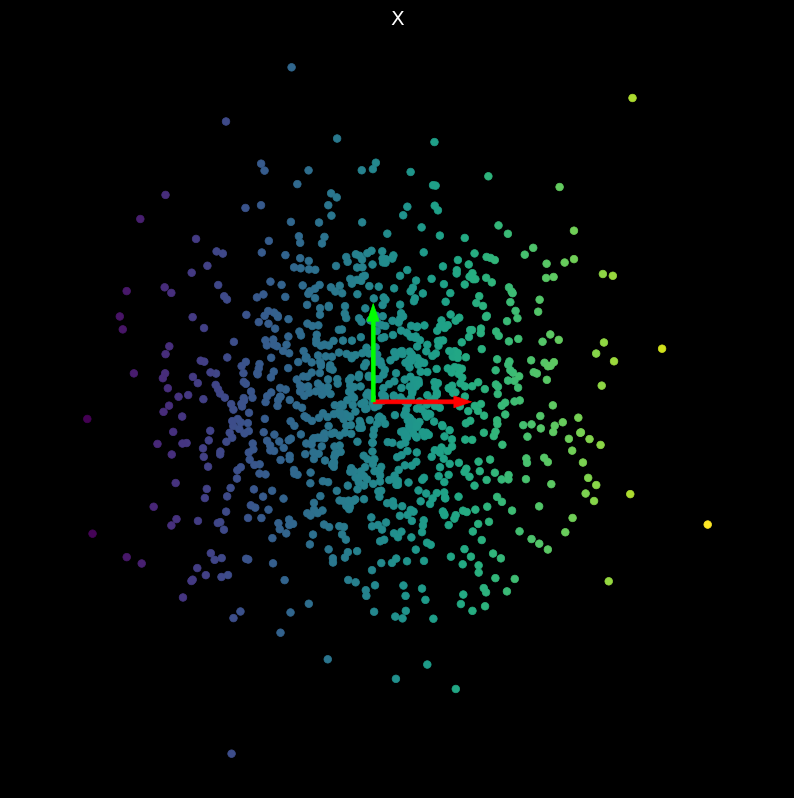

In [11]:
# generating some points in a 2D space
n = 1000
X = torch.randn(n, 2).to(device)

colors = X[:, 0]

show_scatterplot(X, colors, title='X')

OI = torch.cat((torch.zeros(2,2), torch.eye(2)))
plot_bases(OI)

## Visualization of Linear Transformation
---

1. First initialize a random matrix W.
2. Let y = Wx
3. W = U diag(S) V<sup>T</sup>
4. Larger singular values stretch the points, whereas the smaller singular values push the points together.
5. U and V singular vectors/matrices reflect/rotate.

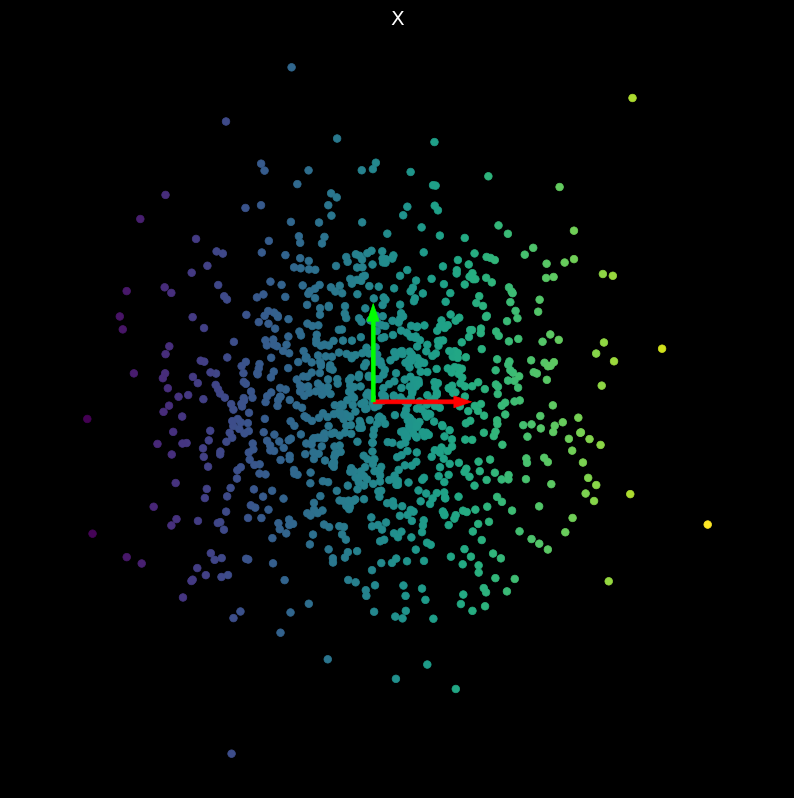

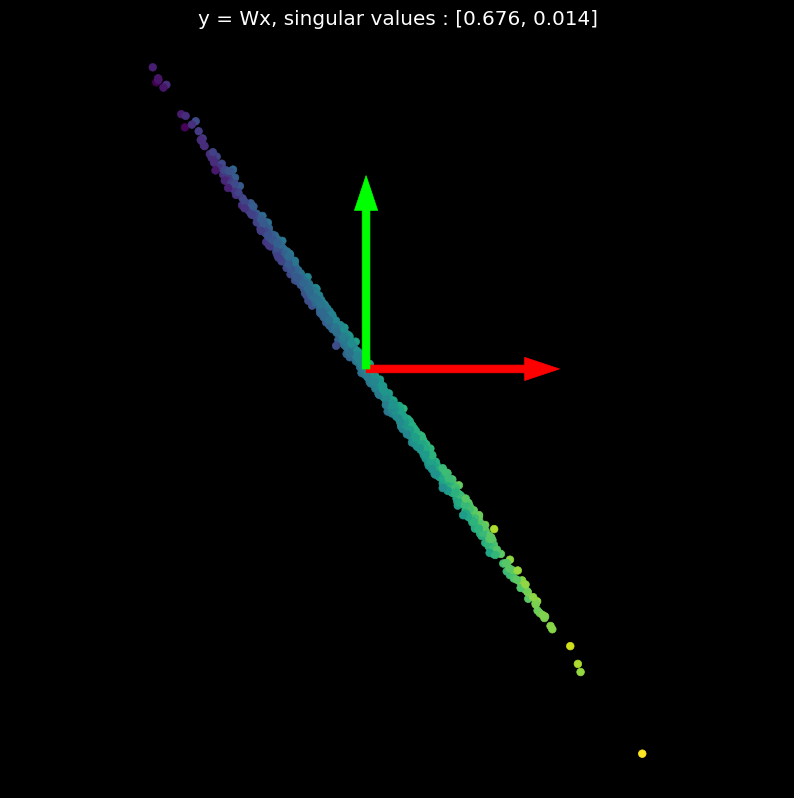

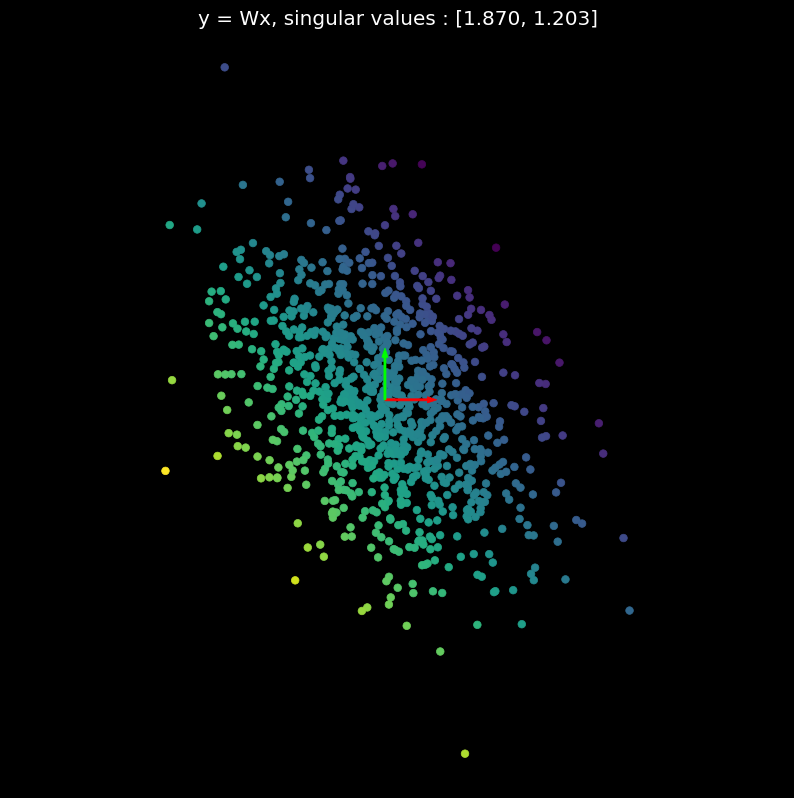

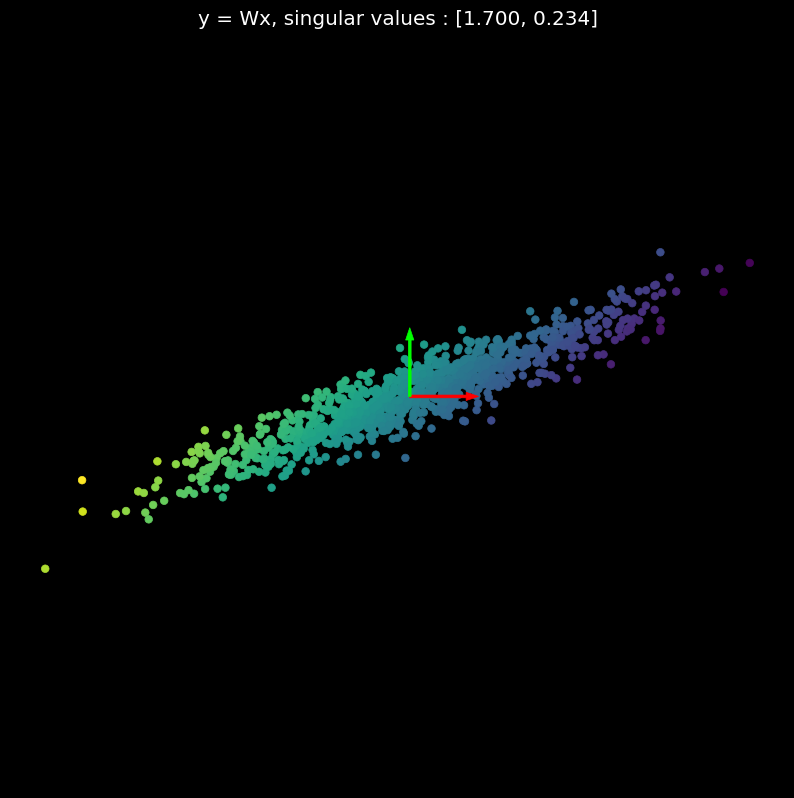

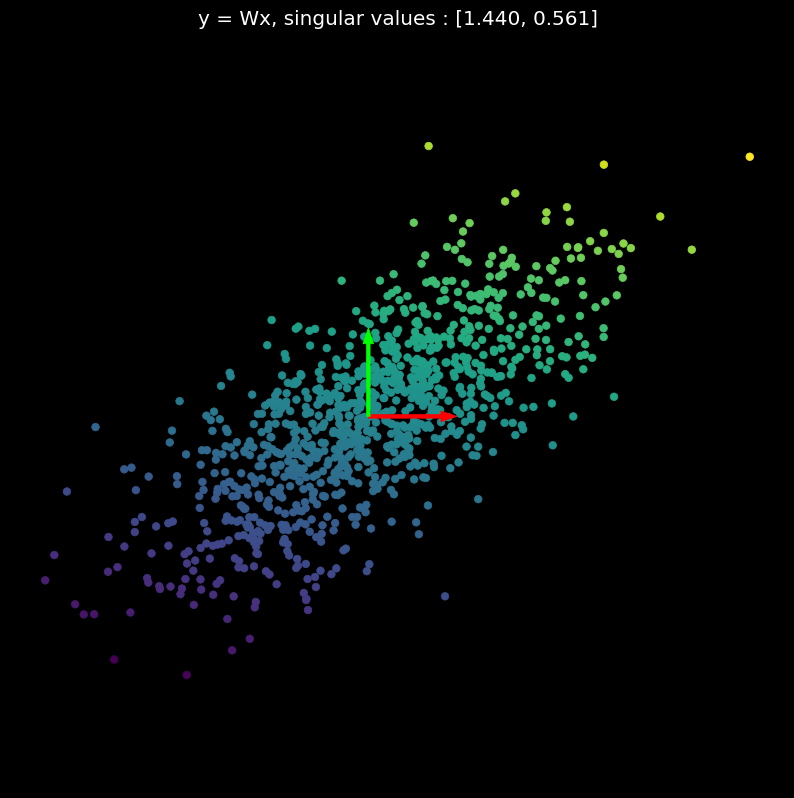

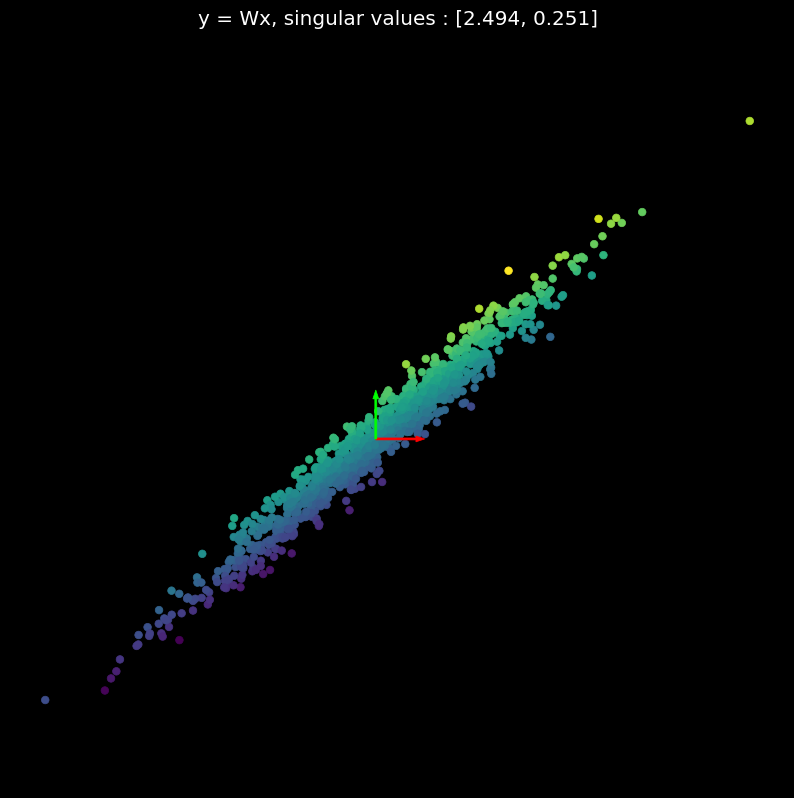

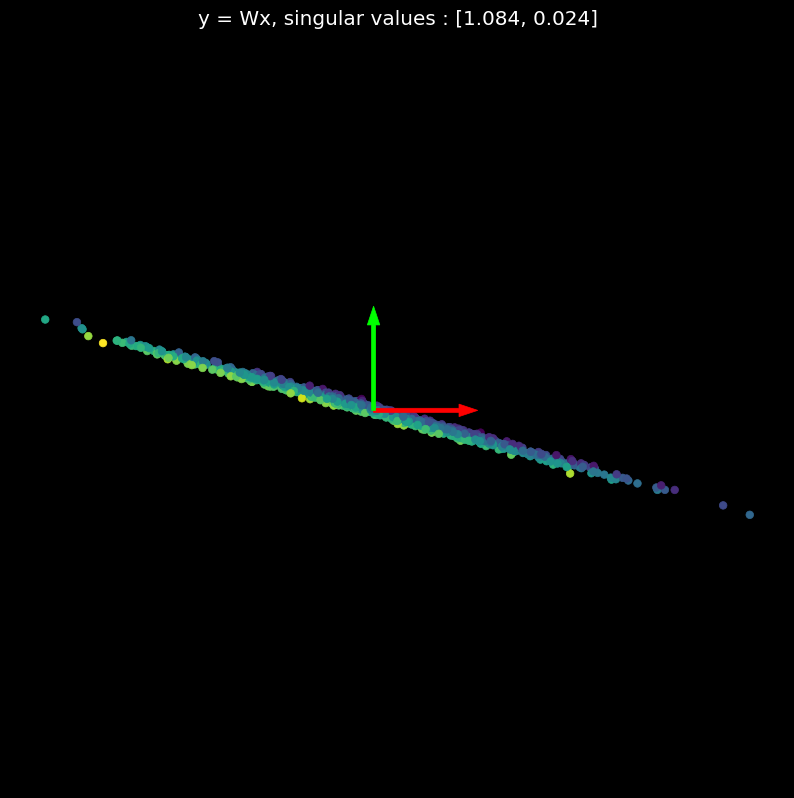

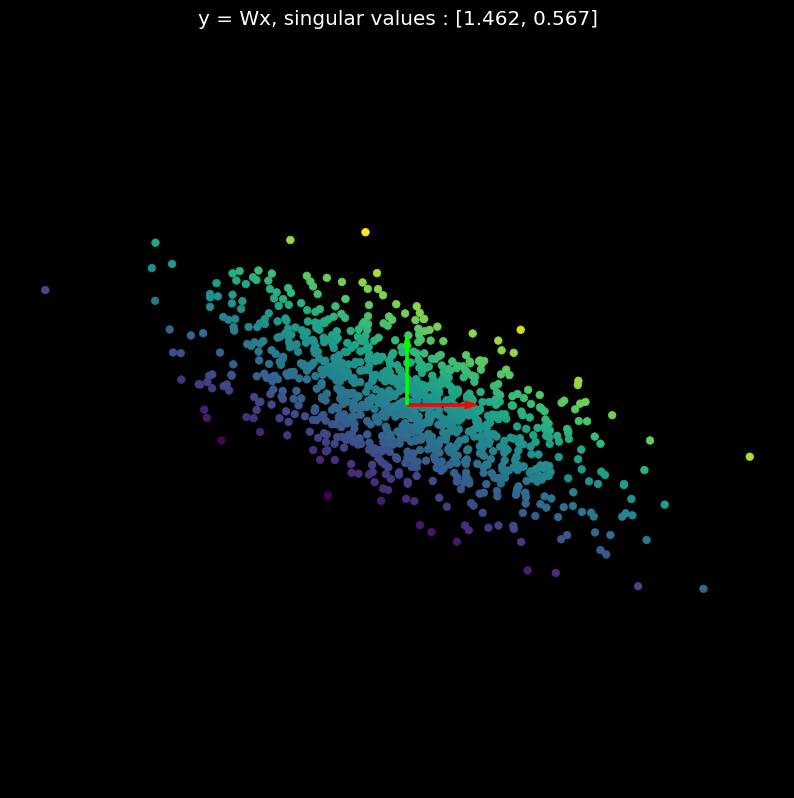

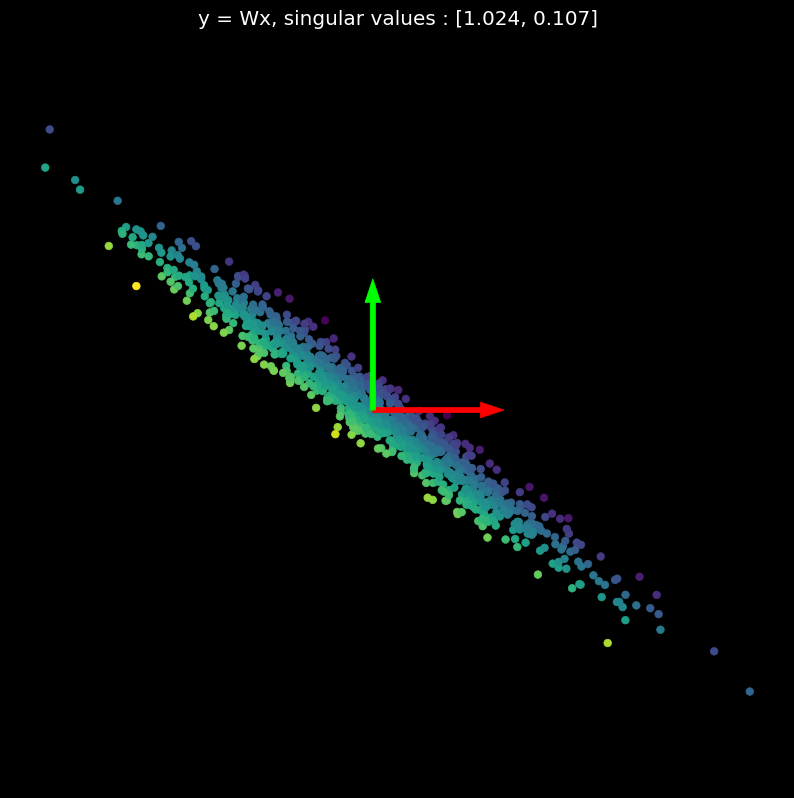

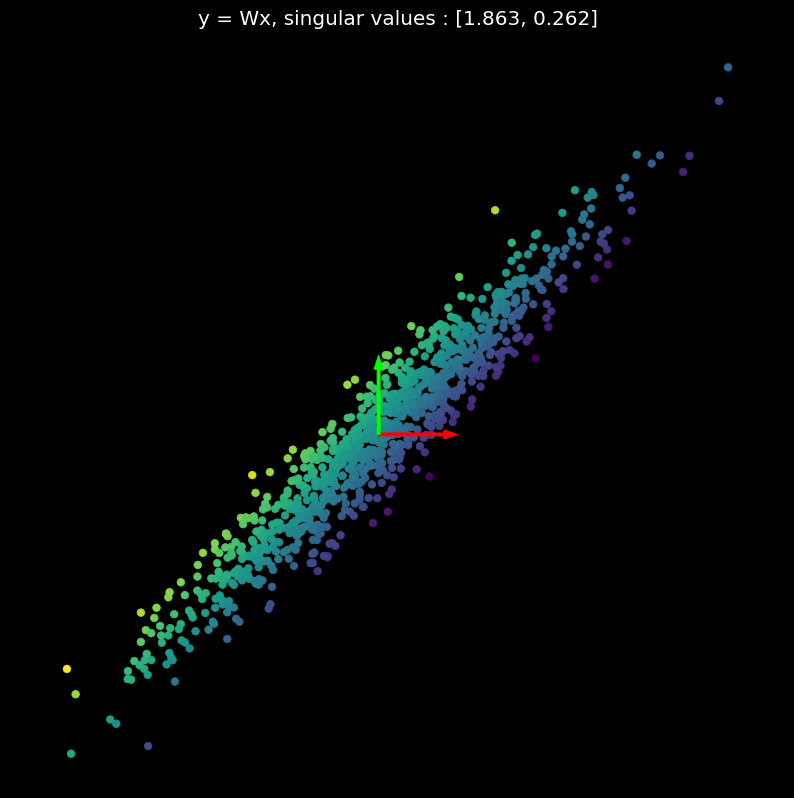

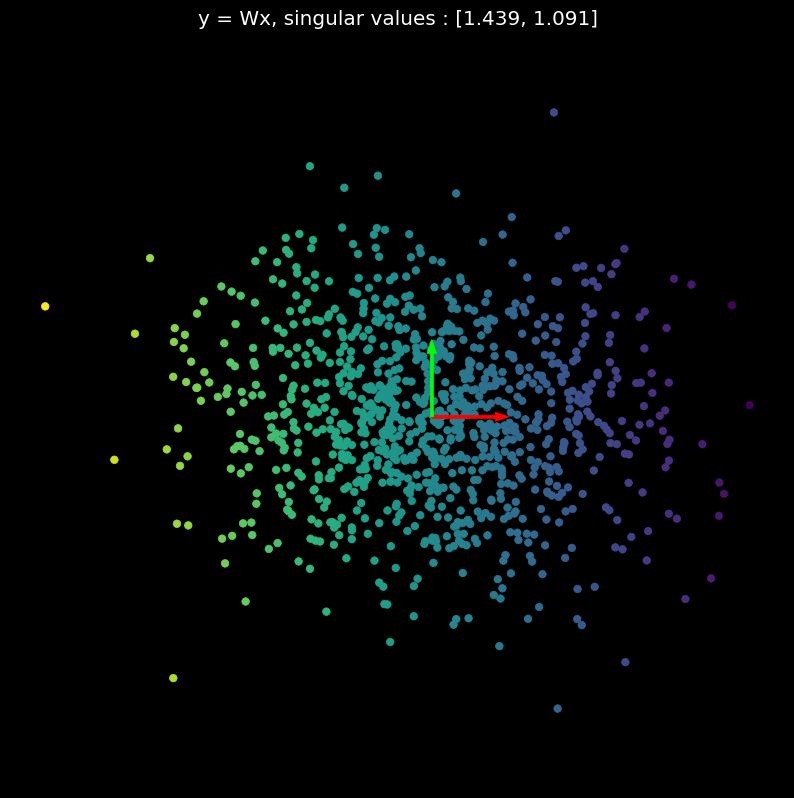

In [12]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

for i in range(10):
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W.t()
    # plot old and new basis
    plot_bases(OI)
#     plot_bases(new_OI)

In [13]:
plot_bases??

Signature: plot_bases(bases, width=0.04)
Docstring: <no docstring>
Source:   
def plot_bases(bases, width=0.04):
    bases = bases.cpu()
    bases[2:] -= bases[:2]
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)
File:      d:\e-learning\nyu-dl\res\plot_lib.py
Type:      function
